$logloss = f(x) + g(x)$

$f(w) = \frac{1}{n}\sum\limits^{n}\ln{(1+e^{-y_k x_k^T w})}$

$g(w) = C ||w||^2_2$

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
import seaborn as sns
sns.set_context("talk")
figsize=(8, 6)
fontsize = 18

import numpy as np
import sklearn.datasets as skldata
import sklearn.preprocessing as skprep
import scipy.optimize as scopt
import sklearn.preprocessing as skprep
import scipy.special as scspec
import cvxpy as cvx
from scipy.sparse import *
import math
import methods

import imp
import methods
imp.reload(methods)

C = 0.00001
m = 64
n = 2048

X,y = methods.create_data(m,n)

def f(w, Xb, yb, C):
    return np.mean(np.logaddexp(np.zeros(X.shape[0]), -y * X.dot(w)))
def g(w, C):
    return C * np.linalg.norm(w,2)**2
def logloss(w, Xb, yb, C):
    return f(w, Xb, yb, C) + g(w, C)
def f_gradient(w, Xb, yb, C):
    denom = scspec.expit(-y * X.dot(w))
    return -  X.T.dot(y * denom) / X.shape[0]
def logloss_gradient(w, Xb, yb, C):
    return 2*C*w + f_gradient(w, Xb, yb, C)
def quad_prox(w, C):
    return w/(2*C+1)

f_ = lambda w : f(w, X, y, C)
f_grad_ = lambda w : f_gradient(w, X, y, C)


X.shape = (2048, 2112) y.shape = (2048,) nonzero in X = (276480,)


In [44]:
import imp
import methods
imp.reload(methods)
#x0 = np.array([0,0,0])
x0 = 1000*np.random.rand(X.shape[1])

x_adSGDa, conv_adSGDa = methods.adapt_SGDac(logloss, logloss_gradient, quad_prox, X, y, C, x0, epochs = 1000)
print("adaptSGDa f*   = {}".format(min([f_(x) + g(x,C) for x in conv_adSGDa])))

#x_adSGD, conv_adSGD = methods.adapt_SGD(logloss, logloss_gradient, quad_prox, X, y, C, x0, epochs = 2000)
#print("adaptSGD f*   = {}".format(min([f_(x) + g(x,C) for x in conv_adSGD])))

#x_prsgd, conv_prsgd = methods.prox_SGD(f,f_gradient,quad_prox, X,y,C,x0,epochs = 30,alpha = 0.1, batch_size = 32)
#print("proxSGD f* = {}".format(min([f_(x) + g(x,C) for x in conv_prsgd])))

x_fprsgd, conv_fprsgd = methods.prox_SGD(f,f_gradient,quad_prox, X, y, C, x0,epochs = 30,alpha = 0.1,
                                         batch_size = 32, accel=True)
print("fastProxSGD f* = {}".format(min([f_(x) + g(x,C) for x in conv_fprsgd])))

x_acc, conv_acc = methods.prox_alg(f_, f_grad_, quad_prox, x0, C, num_iter = 2000, alpha=0.1, accel=True)
print("FISTA f*   = {}".format(min([f_(x) + g(x,C) for x in conv_acc])))


adaptSGDa f*   = 6357.672388236895
fastProxSGD f* = 35.01092046533587
FISTA f*   = 35.31050048607499


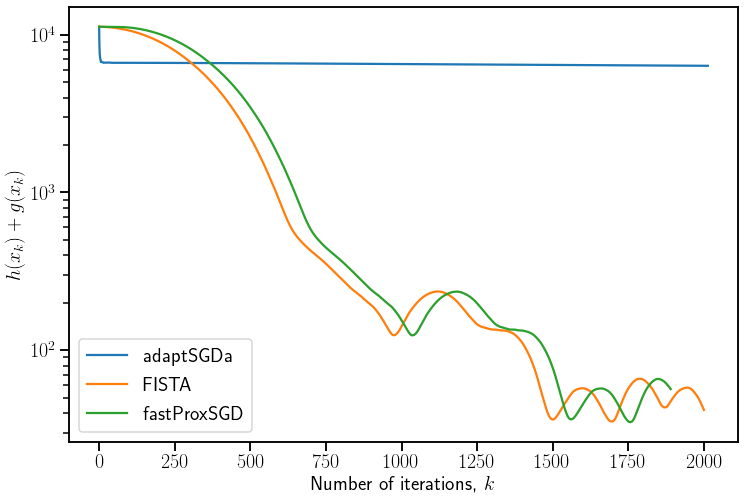

In [45]:
plt.figure(figsize=(12, 8))
fontsize=20
#plt.plot([f_(x) + g(x,C) for x in conv_adSGD], label="adaptSGD")
plt.plot([f_(x) + g(x,C) for x in conv_adSGDa], label="adaptSGDa")
plt.plot([f_(x) + g(x,C) for x in conv_acc], label="FISTA")
#plt.plot([f_(x) + g(x,C) for x in conv_prsgd], label="proxSGD")
plt.plot([f_(x) + g(x,C) for x in conv_fprsgd], label="fastProxSGD")
plt.legend(fontsize=fontsize)
plt.xlabel(r"Number of iterations, $k$", fontsize=fontsize)
plt.ylabel(r"$h(x_k) + g(x_k)$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)
plt.yscale("log")